# Multilayer Perceptron

- Support Vector Classifier (SVC)
- Random Forest Classifier (RFC)
- **Multilayer Perceptron (MLP)**

A Multilayer Perceptron (MLP) is basically a feedforward artificial neural network (ANN). There's still an ambiguity in the definition of MLP, but, at least, this vanilla NN is what we are going to do here.

Everyone learning ANN for the first time starts with this model, so I don't think I really need to describe what it is here again. The constitution of MLP is somewhat inuitive in my opinion compared to other classical methods which require a little bit of mathematics and probability theory.

Instead, this page will be a quick reference on training an MLP model using `sklearn`.

`sklearn` provides the MLP classifier, but in the future postings on my webpage, I'll probably use `Keras` when it comes to studying neural networks. I need the Tensorflow backend that `Keras` offers for GPU computation.

Let's start with the iris data as usual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
x_train = iris.data[0:-1:2]
y_train = iris.target[0:-1:2]
x_test = iris.data[1:-1:2]
y_test = iris.target[1:-1:2]

print(x_train.shape)
print(x_test.shape)
print(iris.data.shape)

(75, 4)
(74, 4)
(150, 4)


To design a (dense) network, we need to specify the number of hidden layers and how many perceptrons will be used in each layer. This is simply declared using a tuple.

For example, let's use three hidden layers with
- 10 perceptrons in the first layer,
- 20 perceptrons in the second layer,
- 10 perceptrons in the third layer.

This is simply declared as
```python
hidden_layer_sizes = (10, 20, 10)
```
in the code below.

In [3]:
# MLP
from sklearn.neural_network import MLPClassifier

# model
model = MLPClassifier(hidden_layer_sizes = (10, 20, 10))
# train
model.fit(x_train, y_train)
# prediction
y_predicted = model.predict(x_test)
# evaluation
print('Percentage correct accuracy of MLP: ', np.mean(y_test == y_predicted))

Percentage correct accuracy of MLP:  0.972972972972973


D:\ProgramData\Miniconda3\envs\myenv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


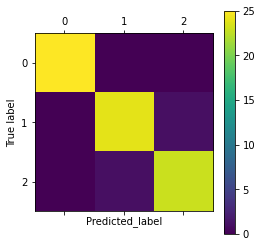

In [4]:
# performance measures and evaluations
from sklearn import metrics

# confusion matrix
matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.matshow(matrix)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted_label')
plt.show()

In [5]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.96      0.96      0.96        25
           2       0.96      0.96      0.96        24

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74

